# 시계열 회귀분석_공기압축기

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import statsmodels.api as sm

In [4]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [5]:
os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회\최종")

In [6]:
raw_data = pd.read_csv("KBV공작_concattt.csv")

In [7]:
comp_1_one = raw_data.drop(columns=['Unnamed: 0'], axis=1)

In [8]:
comp_1_one['NEWTIME'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('NEWTIME', inplace=True)

# train test 분할

In [18]:
X = comp_1_one
X_train = comp_1_one[:53280]
X_test = comp_1_one[53280:]
X_train = X_train[['전류평균', '온도', '선간전압평균', '상전압평균', '유효전력평균', '누적전력량', '역률평균', '주파수', '전압고조파평균', '무효전력평균']]
X_test = X_test[['전류평균', '온도', '선간전압평균', '상전압평균', '유효전력평균', '누적전력량', '역률평균', '주파수', '전압고조파평균', '무효전력평균']]

<AxesSubplot:>

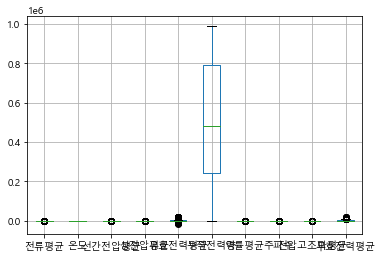

In [19]:
X_train.boxplot()

# 표준화

In [20]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [21]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [22]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [23]:
X_train_scaling

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
NEWTIME,,,,,,,,,,
2020-09-16 00:00:00,0.947034,1.018342,1.251551,1.256032,0.625196,0.338302,-1.626512,1.066855,1.515661,1.203627
2020-09-16 00:01:00,0.942911,0.870781,0.728985,0.798817,0.628920,0.338404,-1.606032,0.469619,1.540574,1.194286
2020-09-16 00:02:00,0.953121,0.870781,0.728985,0.685198,0.613200,0.338506,-1.626512,0.186718,1.466589,1.188002
2020-09-16 00:03:00,0.932701,0.870781,1.055686,1.027425,0.624576,0.338608,-1.619685,-1.290656,1.294460,1.200400
2020-09-16 00:04:00,0.944874,1.018342,0.989876,0.798817,0.622094,0.338710,-1.619685,-0.127617,1.319373,1.193437
...,...,...,...,...,...,...,...,...,...,...
2020-10-22 23:55:19,1.666882,-1.342630,1.185997,1.255572,1.581421,-1.420492,-2.032632,-0.994238,1.958063,3.065884
2020-10-22 23:56:19,2.844974,-1.195069,1.838886,1.825958,3.173268,-1.420344,-0.549720,-0.408130,2.203816,2.720097
2020-10-22 23:57:19,1.699606,-1.195069,1.773590,1.940026,1.141471,-1.420207,-1.816393,-1.580787,2.105515,2.110384


In [24]:
X_test_scaling

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
NEWTIME,,,,,,,,,,
2020-10-23 00:00:19,1.771192,-1.195069,2.557047,2.738559,1.188838,-1.419806,-1.846676,-0.701592,2.228391,2.215004
2020-10-23 00:01:19,1.718014,-1.342630,2.557047,2.624480,1.160707,-1.419664,-1.821526,0.472857,2.179240,2.144012
2020-10-23 00:02:19,1.726195,-1.195069,2.165318,2.168185,1.177875,-1.419530,-1.794943,-2.166393,2.179240,2.136709
2020-10-23 00:03:19,1.732331,-1.490190,2.230615,2.282253,1.152640,-1.419397,-1.815539,-0.114352,2.056364,2.125330
2020-10-23 00:04:19,1.711878,-1.342630,2.361182,2.510411,1.143126,-1.419265,-1.833535,0.765785,2.056364,2.133142
...,...,...,...,...,...,...,...,...,...,...
2020-10-27 23:55:19,2.619992,-1.342630,0.663701,0.913346,2.607351,-0.712398,-0.920156,-0.994238,2.842773,2.716021
2020-10-27 23:56:19,2.767253,-1.195069,1.316577,1.483731,2.773238,-0.712172,-0.904120,-0.994710,2.867348,2.860722
2020-10-27 23:57:19,2.585221,-1.195069,1.447158,1.597799,2.492348,-0.711948,-1.021555,-0.408318,2.547869,2.739119


# VIF 확인

처음에 다 넣고 유효전력, 무효전력, 상전압 제거한 과정 보여주기

In [37]:
X_train_scaling = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
X_test_scaling = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# correlation from features
X_train.corr().style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})

,전류평균,온도,유효전력평균,누적전력량,주파수,전압고조파평균
전류평균,1.00,-0.19,0.90,-0.11,-0.13,0.44
온도,-0.19,1.00,-0.16,0.12,0.55,-0.41
유효전력평균,0.90,-0.16,1.00,-0.09,-0.10,0.40
누적전력량,-0.11,0.12,-0.09,1.00,0.04,0.07
주파수,-0.13,0.55,-0.10,0.04,1.00,-0.25
전압고조파평균,0.44,-0.41,0.40,0.07,-0.25,1.00


In [40]:
# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                     for i in range(X_train.shape[1])]
vif['Feature'] = X_train.columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,Feature
3,1.058654,누적전력량
4,1.432229,주파수
5,1.490531,전압고조파평균
1,1.643785,온도
2,5.396219,유효전력평균
0,5.709995,전류평균


# 정상화 및 정상성 테스트(ADF, KPSS)

In [273]:
! pip install module

In [274]:
## ADF 검증 (누적전력량만 불안정)
#시계열이 안정적인지 여부를 확인하는데 이용하는 방법

### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인
# H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.
# H1(대립가설) : 자료가 정상성을 만족한다.

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result=adfuller(df.values)
    print('ADF Statistic : %f ' % result[0])
    print('p-value : %f' % result[1])
    print('Critical Values:')

    for key,value in result[4].items():
        print('\t%s : %.3f' % (key,value))
        
for col in X_train_scaling.columns:
    print(col)
    adf_test(X_train_scaling[col])

온도
ADF Statistic : -4.825766 
p-value : 0.000049
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567
유효전력평균
ADF Statistic : -16.827478 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567
누적전력량
ADF Statistic : -2.568020 
p-value : 0.099789
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567
주파수
ADF Statistic : -0.627950 
p-value : 0.864541
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567
전압고조파평균
ADF Statistic : -4.153136 
p-value : 0.000790
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567
무효전력평균
ADF Statistic : -13.038434 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567
역률평균
ADF Statistic : -15.367692 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


In [275]:
import warnings
warnings.filterwarnings('ignore')

## KPSS 검증
#시계열이 평균 또는 선형 추세 주변에 고정되어 있는지 또는 단위 루트로 인해 고정되지 않은지 확인
# 귀무가설 : 시계열이 안정적
# 대립가설 : 시계열이 안정적이지 않음 (adf와 반대)

## 모두 0.05보다 작으므로 귀무가설 기각 -> 시계열이 안정적이지 않음......

from statsmodels.tsa.stattools import kpss

def kpss_test(df):
    statistic,p_value,n_lags,critical_values=kpss(df.values)
    
    print(f'KPSS Statistic : {statistic}')
    print(f'p-vluae : {p_value}')
    print(f'num_lags : {n_lags}')
    print('Critical Values : ')
    
    for key, value in critical_values.items():
        print(f' {key} : {value}')
        
for col in X_train_scaling.columns:
    print(col)
    kpss_test(X_train_scaling[col])

온도
KPSS Statistic : 38.5063098908396
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
유효전력평균
KPSS Statistic : 7.4008376688458375
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
누적전력량
KPSS Statistic : 11.114109682139214
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
주파수
KPSS Statistic : 69.12679971620949
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
전압고조파평균
KPSS Statistic : 48.102407183552785
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
무효전력평균
KPSS Statistic : 7.98642396412906
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
역률평균
KPSS Statistic : 7.891572580925691
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


In [225]:
### ADF 검증
# 0.05보다 작은 게 정상성 만족 -> 처리 안해줘도 됨
# 0.05보다 큰 게 정상성 불만족 -> 처리

### KPSS는
# 0.05보다 커야 안정적

ADF 테스트와 KPSS 테스트를 모두 사용하여 시계열의 안정성에 대해 교차 확인  
-> ADF 결과와 KPSS 결과가 맞지 않음... 확인 필요...

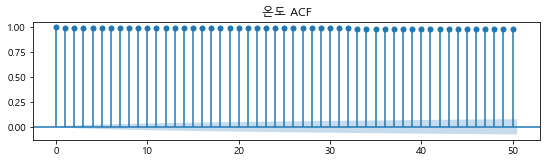

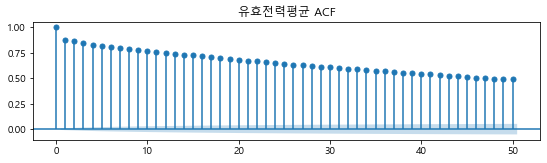

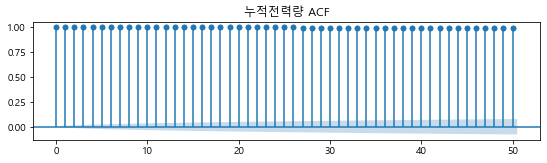

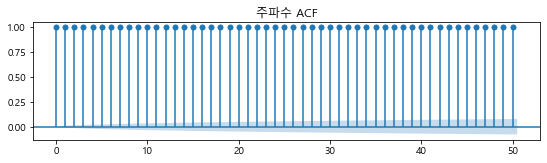

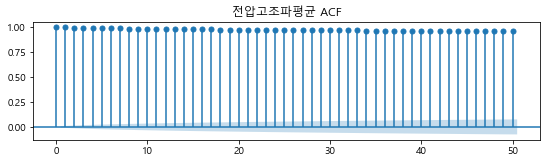

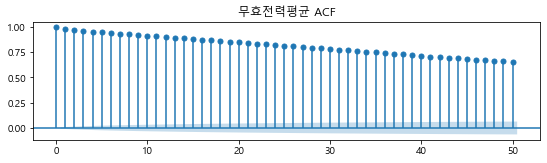

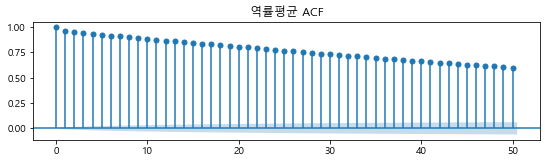

In [276]:
## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

import statsmodels.api as sm

for i in X_train_scaling.columns:
    j=1
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(4,2,j)
    fig=sm.graphics.tsa.plot_acf(X_train_scaling[i],lags=50, ax=ax, use_vlines=True, title='{} ACF'.format(i)) #자기상관계수
    j+=1
    
## ACF값이 아주 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미

#### 추세제거 및 정상성 확인

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   역률평균   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.889e+05
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:22:13   Log-Likelihood:                 16064.
No. Observations:               63360   AIC:                        -3.211e+04
Df Residuals:                   63353   BIC:                        -3.205e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.306e-15      0.001  -1.75e-12      1.000      -0.001       0.001
온도             0.0060      0.001      7.162      0.000       0.004       0.008
유효전력평균         0.5872      0.001    410.076      0.000       0.584       0.590
누적전력량         -0.0006      0.001     -0.762      0.446      -0.002       0.001
주파수            0.0339      0.002     19.884      0.000       0.031       0.037
전압고조파평균       -0.0295      0.002    -18.888      0.000      -0.033      -0.026
무효전력평균         0.4214      0.002    280.565      0.000       0.418       0.424
==============================================================================
Omnibus:                   241473.208   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     606959680683.674
Skew:                         -87.414   Prob(JB):                         0.00
Kurtosis:                   15164.742   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

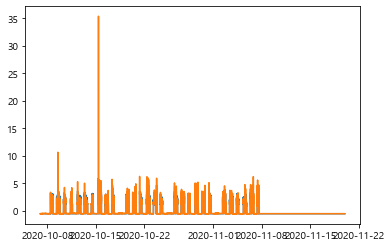

In [227]:
#c(month):더미화, -1:절편제거
result = sm.OLS.from_formula(formula='역률평균 ~ 온도 + 유효전력평균 + 누적전력량 + 주파수+ 전압고조파평균 + 무효전력평균', data=X_train_scaling).fit() 
display(result.summary())

plt.plot(X_train_scaling.index, X_train_scaling.역률평균, X_train_scaling.index, result.fittedvalues)
plt.show()

In [228]:
## ADF 검증
adf_test(result.fittedvalues)

ADF Statistic : -15.012157 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


In [229]:
## KPSS 검증
kpss_test(result.fittedvalues)

KPSS Statistic : 8.354885701569584
p-vluae : 0.01
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


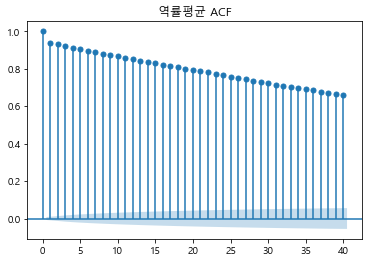

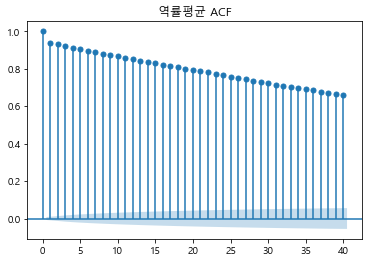

In [230]:
sm.graphics.tsa.plot_acf(result.fittedvalues,lags=40, use_vlines=True, title='역률평균 ACF') #자기상관계수

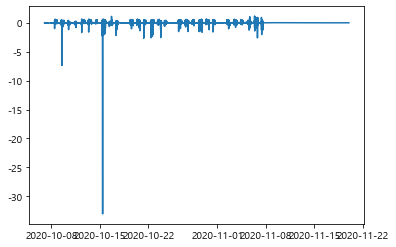

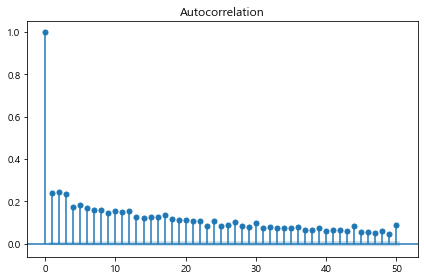

In [231]:
# 추세 제거 및 정상성 확인 
## 방법1
plt.plot(X_train_scaling.index, result.resid)
plt.show()

sm.graphics.tsa.plot_acf(result.resid, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

In [232]:
## ADF 검증
adf_test(result.resid)

ADF Statistic : -23.499967 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


In [233]:
## KPSS 검증
kpss_test(result.resid)

KPSS Statistic : 0.33826568417395486
p-vluae : 0.1
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


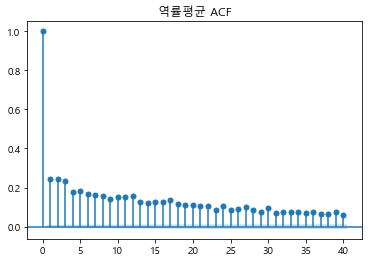

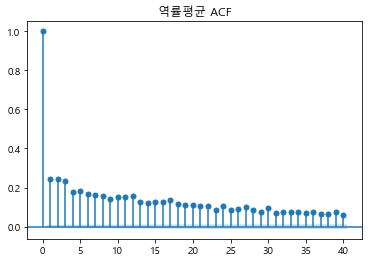

In [234]:
sm.graphics.tsa.plot_acf(result.resid,lags=40, use_vlines=True, title='역률평균 ACF') #자기상관계수

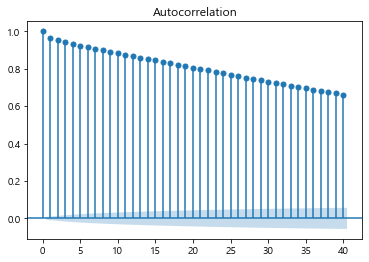

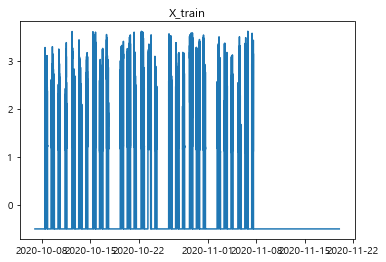

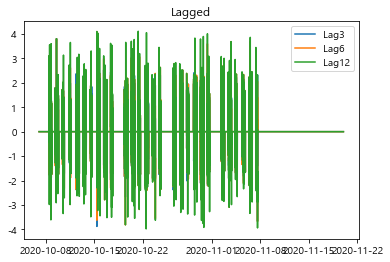

In [277]:
# 계절성 제거 및 정상성 확인
## 방법2
sm.graphics.tsa.plot_acf(X_train_scaling.역률평균, lags=40, use_vlines=True)
plt.show()

plt.plot(X_train_scaling.index, X_train_scaling.역률평균)
plt.title('X_train')
plt.show()
seasonal_lag = 3
plt.plot(X_train_scaling.index[seasonal_lag:], X_train_scaling.역률평균.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(X_train_scaling.index[seasonal_lag:], X_train_scaling.역률평균.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(X_train_scaling.index[seasonal_lag:], X_train_scaling.역률평균.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

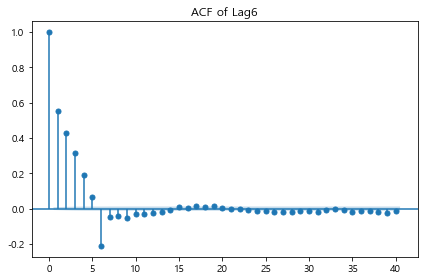

In [279]:
seasonal_lag = 6

sm.graphics.tsa.plot_acf(X_train_scaling.역률평균.diff(seasonal_lag).dropna(), lags=40, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

In [237]:
## ADF 검증
adf_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

ADF Statistic : -36.854359 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


In [238]:
## KPSS 검증
kpss_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

KPSS Statistic : 0.0014056189328475234
p-vluae : 0.1
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


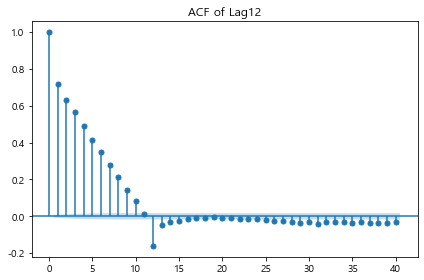

In [239]:
seasonal_lag = 12
sm.graphics.tsa.plot_acf(X_train_scaling.역률평균.diff(seasonal_lag).dropna(), lags=40, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

In [240]:
## ADF 검증
adf_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

ADF Statistic : -37.017187 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


In [241]:
## KPSS 검증
kpss_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

KPSS Statistic : 0.0014601478808472213
p-vluae : 0.1
num_lags : 61
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


#### 계절성 제거 train셋

change_value_dict = {0 :0.01}
X_train_scaling = X_train_scaling.replace({'전류평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'온도':change_value_dict})
X_train_scaling = X_train_scaling.replace({'선간전압평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'누적전력량':change_value_dict})
X_train_scaling = X_train_scaling.replace({'역률평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'주파수':change_value_dict})
X_train_scaling = X_train_scaling.replace({'전압고조파평균':change_value_dict})

X_test_scaling = X_train_scaling.replace({'전류평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'온도':change_value_dict})
X_test_scaling = X_train_scaling.replace({'선간전압평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'누적전력량':change_value_dict})
X_test_scaling = X_train_scaling.replace({'역률평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'주파수':change_value_dict})
X_test_scaling = X_train_scaling.replace({'전압고조파평균':change_value_dict})

In [41]:
seasonal_lag = 6

for i in X_train_scaling.columns:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag)
    
for i in X_test_scaling.columns:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag)

In [42]:
X_train_scaling = X_train_scaling.dropna()
X_test_scaling = X_test_scaling.dropna()

In [43]:
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   역률평균   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                 3.066e+04
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:47:48   Log-Likelihood:                 9346.6
No. Observations:               63354   AIC:                        -1.868e+04
Df Residuals:                   63347   BIC:                        -1.862e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.369e-05      0.001      0.101      0.920      -0.002       0.002
온도            -0.0020      0.006     -0.317      0.751      -0.014       0.010
유효전력평균         0.5341      0.001    366.011      0.000       0.531       0.537
누적전력량         -0.0748      0.020     -3.801      0.000      -0.113      -0.036
주파수            0.3891      0.039     10.061      0.000       0.313       0.465
전압고조파평균       -0.0186      0.005     -3.667      0.000      -0.029      -0.009
무효전력평균         0.1149      0.003     42.913      0.000       0.110       0.120
==============================================================================
Omnibus:                    46053.180   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37023722756.497
Skew:                          -1.180   Prob(JB):                         0.00
Kurtosis:                    3748.058   Cond. No.                         46.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

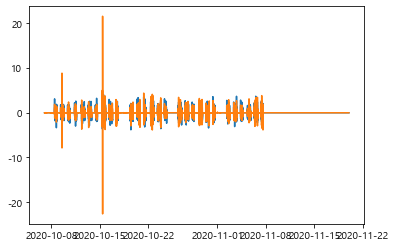

In [289]:
#c(month):더미화, -1:절편제거
result = sm.OLS.from_formula(formula='역률평균 ~ 온도 + 유효전력평균 + 누적전력량 + 주파수+ 전압고조파평균 + 무효전력평균', data=X_train_scaling).fit() 
display(result.summary())

plt.plot(X_train_scaling.index, X_train_scaling.역률평균, X_train_scaling.index, result.fittedvalues)
plt.show()

In [290]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(y_train, X_train).fit() #회귀분석 계산
display(fit_reg1.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   역률평균   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                          3.066e+04
Date:                Sun, 12 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:47:48   Log-Likelihood:                          9346.5
No. Observations:               63354   AIC:                                 -1.868e+04
Df Residuals:                   63348   BIC:                                 -1.863e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
온도            -0.0020      0.006     -0.317      0.751      -0.014       0.010
유효전력평균         0.5341      0.001    366.014      0.000       0.531       0.537
누적전력량         -0.0748      0.020     -3.801      0.000      -0.113      -0.036
주파수            0.3891      0.039     10.061      0.000       0.313       0.465
전압고조파평균       -0.0186      0.005     -3.667      0.000      -0.029      -0.009
무효전력평균         0.1149      0.003     42.913      0.000       0.110       0.120
==============================================================================
Omnibus:                    46053.188   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37023804974.166
Skew:                          -1.180   Prob(JB):                         0.00
Kurtosis:                    3748.062   Cond. No.                         30.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

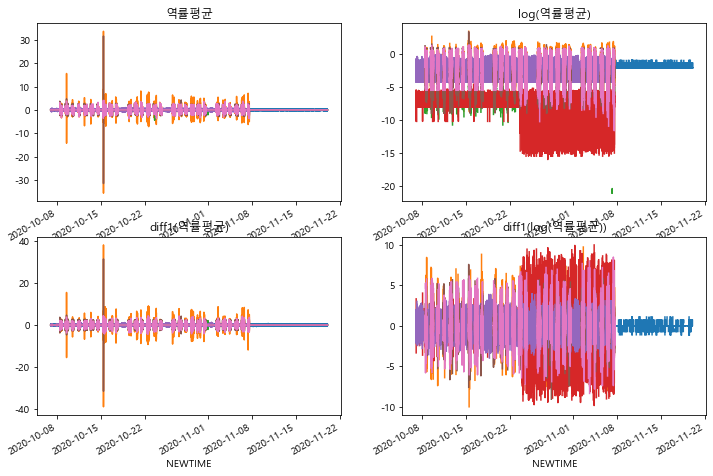

In [291]:
## 로그변환

## 정상성 확보
plt.figure(figsize=(12,8))
X_train_scaling.plot(ax=plt.subplot(221), title='역률평균', legend=False)
np.log(X_train_scaling).plot(ax=plt.subplot(222), title='log(역률평균)', legend=False)
X_train_scaling.diff(1).plot(ax=plt.subplot(223), title='diff1(역률평균)', legend=False)
np.log(X_train_scaling).diff(1).plot(ax=plt.subplot(224), title='diff1(log(역률평균))', legend=False)
plt.show()

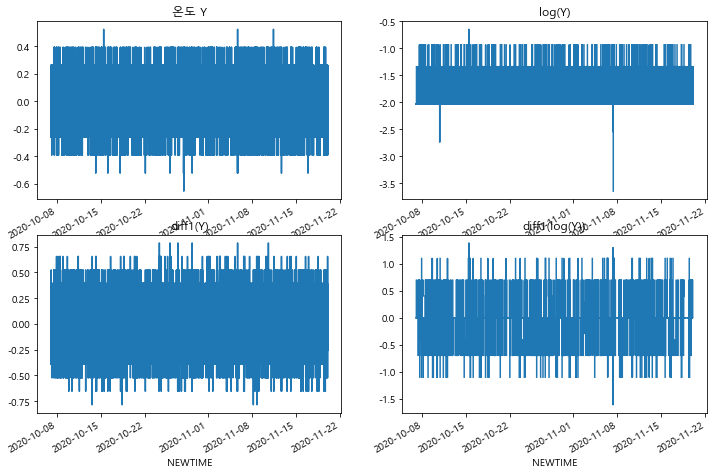

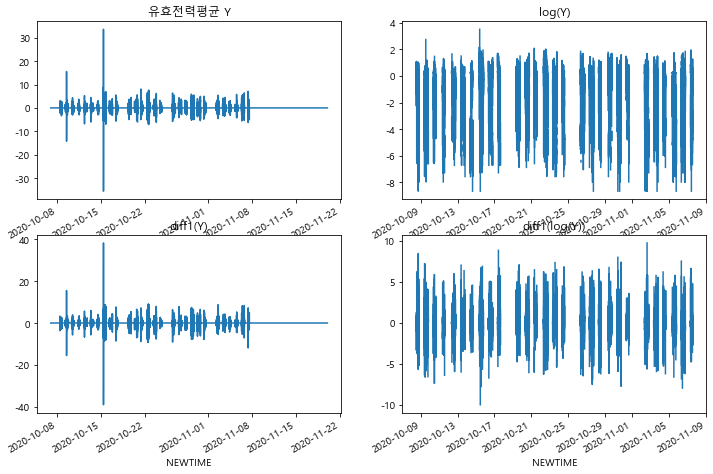

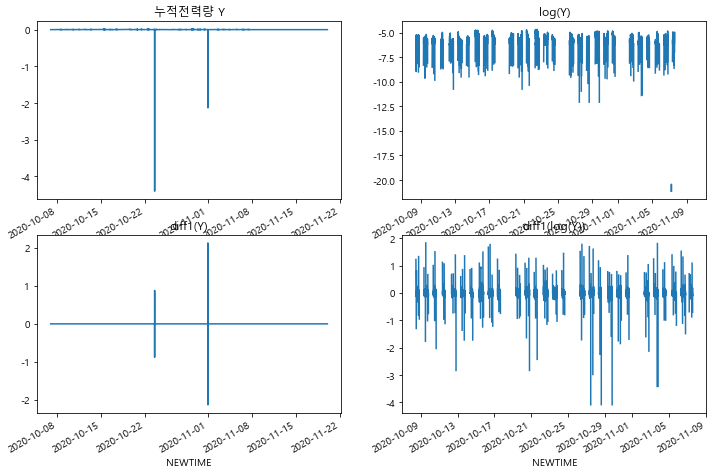

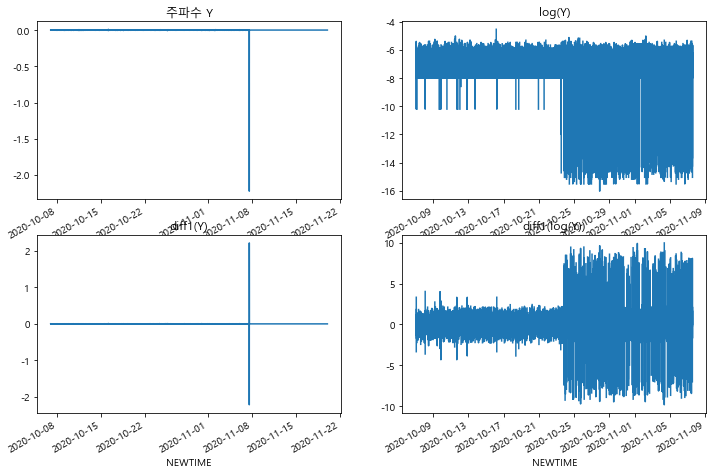

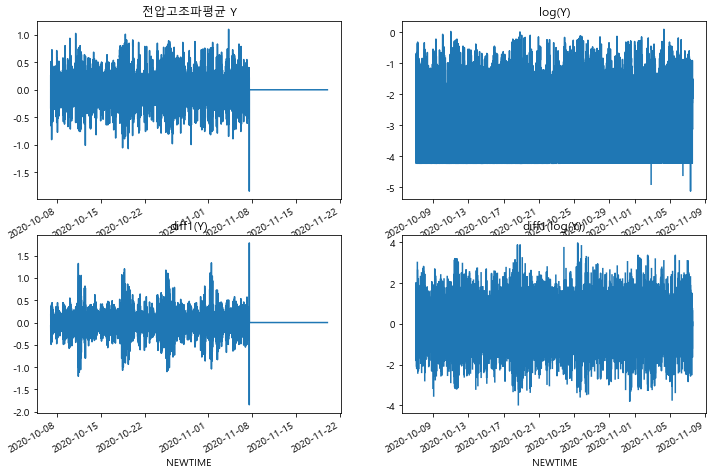

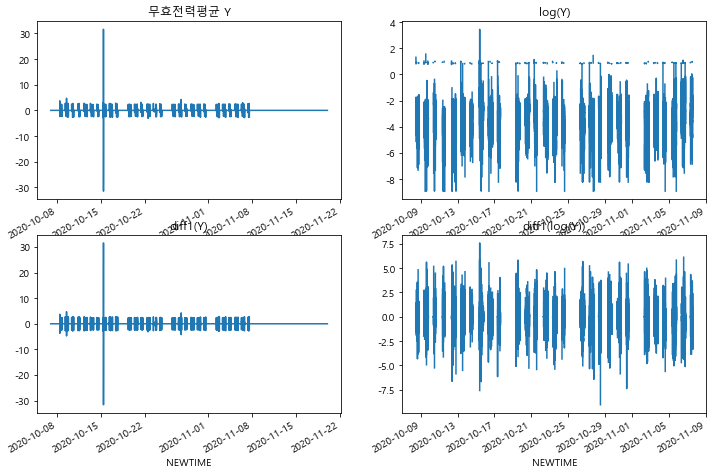

In [292]:
for raw in X_train.columns:
    plt.figure(figsize=(12,8))
    X_train[raw].plot(ax=plt.subplot(221), title='{} Y'.format(raw), legend=False)
    np.log(X_train[raw]).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
    X_train[raw].diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
    np.log(X_train[raw]).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
    plt.show()

# OLS Regression

#로그변했을 때  
#raw_log = np.log1p(X_train_scaling)
#test_log = np.log1p(X_test_scaling)

#데이터 분할(로그)  
Y_colname = ['전압고조파평균'] #예측할 att  
X_colname = ['온도', '전류평균', '역률평균']  

X_train = raw_log[['전류평균', '온도', '전압고조파평균']]  
X_test = test_log[['전류평균', '온도', '전압고조파평균']]  
Y_train = raw_log['역률평균']  
Y_test = test_log['역률평균']  

차분 적용했을 때  
X_train_diff=X_train_scaling.diff(1)[1:]
X_test_diff=X_test_scaling.diff(1)[1:]

X_train = X_train_diff[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
X_test = X_test_diff[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
Y_train = X_train_diff['역률평균']
Y_test = X_test_diff['역률평균']

In [101]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit() #회귀분석 계산
display(fit_reg1.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   역률평균   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                          3.984e+04
Date:                Fri, 10 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:27:39   Log-Likelihood:                         -23980.
No. Observations:               43135   AIC:                                  4.797e+04
Df Residuals:                   43130   BIC:                                  4.801e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전류평균           0.8129      0.003    312.723      0.000       0.808       0.818
선간전압평균        -0.1116      0.003    -42.131      0.000      -0.117      -0.106
누적전력량         -0.0072      0.001     -6.936      0.000      -0.009      -0.005
주파수            0.0429      0.002     20.494      0.000       0.039       0.047
누적전력량         -0.0072      0.001     -6.936      0.000      -0.009      -0.005
전압고조파평균        0.0934      0.002     42.371      0.000       0.089       0.098
==============================================================================
Omnibus:                     4161.380   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16103.048
Skew:                           0.436   Prob(JB):                         0.00
Kurtosis:                       5.863   Cond. No.                     3.19e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [125]:
# 예측값
pred_tr_reg1 = fit_reg1.predict(X_train1).values
pred_te_reg1 = fit_reg1.predict(X_test1).values

In [126]:
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(
            kind='line', figsize=(20,6),xlim=(Y_real.index.min(),Y_real.index.max()),linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual

In [127]:
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

            MAE       MSE  MAPE
Train  0.111181  0.103492   inf
Test   0.171778  0.194766   inf
                        Error
NEWTIME                      
2020-09-16 00:06:00 -0.001197
2020-09-16 00:07:00 -0.041263
2020-09-16 00:08:00 -0.001837
2020-09-16 00:09:00 -0.045218
2020-09-16 00:10:00  0.013471
...                       ...
2020-10-15 22:50:00  0.763590
2020-10-15 22:51:00 -1.839900
2020-10-15 22:52:00 -0.086314
2020-10-15 22:53:00 -0.524759
2020-10-15 22:54:00 -1.146041

[43129 rows x 1 columns]
                        Error
NEWTIME                      
2020-10-15 23:01:00  0.380449
2020-10-15 23:02:00  0.429276
2020-10-15 23:03:00  0.049204
2020-10-15 23:04:00  0.748928
2020-10-15 23:05:00  0.974936
...                       ...
2020-10-27 23:55:19  0.581613
2020-10-27 23:56:19  0.776987
2020-10-27 23:57:19  0.717482
2020-10-27 23:58:19 -0.020711
2020-10-27 23:59:19 -0.091866

[17339 rows x 1 columns]


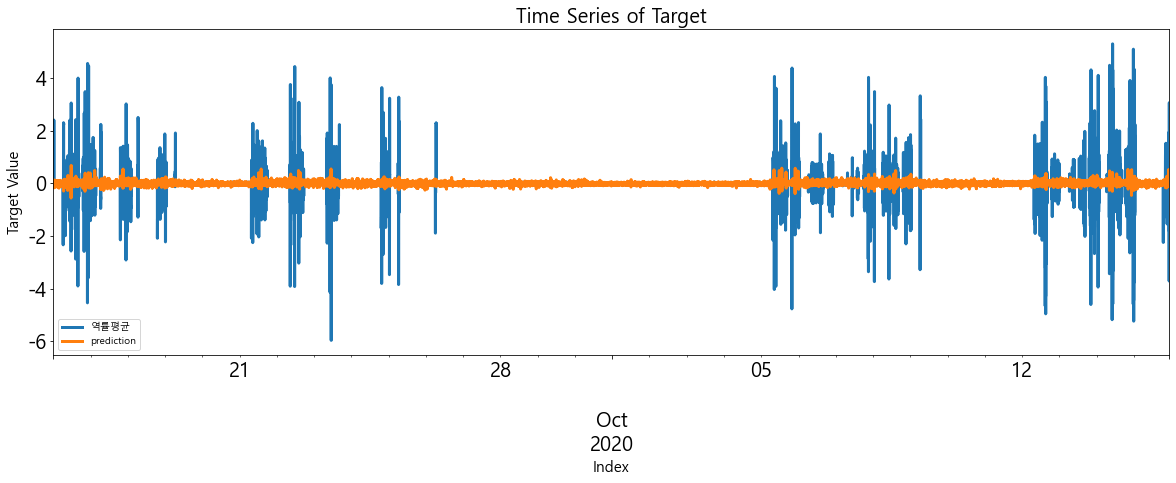

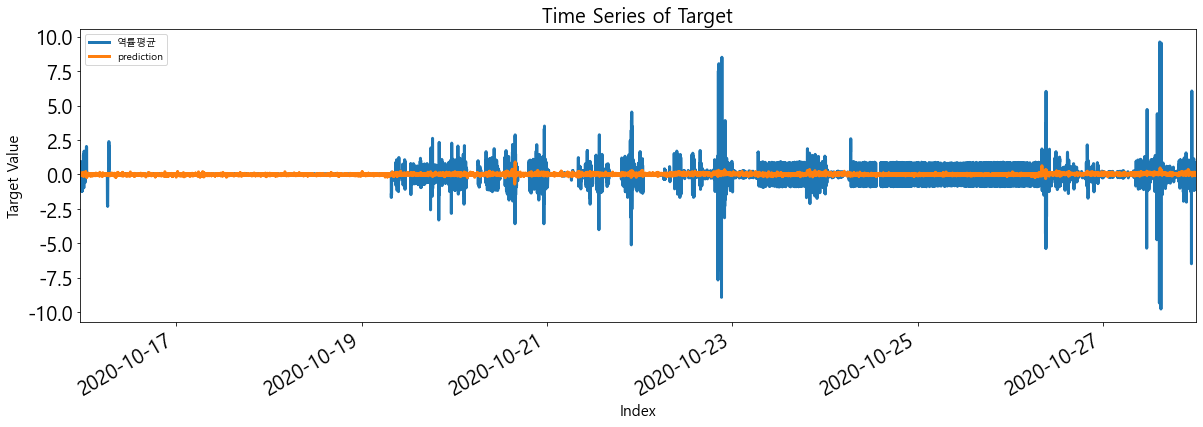

In [128]:
# 예측값 평가
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train1, pred_tr_reg1, Y_test1, pred_te_reg1, graph_on=True)
print(Score_reg1)
print(Resid_tr_reg1)
print(Resid_te_reg1)

# 잔차분석

# LSTM 적용(차분된 데이터로)

In [340]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [341]:
comp_1_one = pd.concat([X_train_scaling, X_test_scaling], axis = 0)

In [343]:
len(comp_1_one[63360:])

7200

In [344]:
TRAIN_SPLIT=63360

In [345]:
comp_1_one[:62260]

,온도,유효전력평균,누적전력량,주파수,전압고조파평균,무효전력평균,역률평균
NEWTIME,,,,,,,
2020-10-07 00:00:00,0.692134,-0.449915,-1.030789,0.626511,1.274883,-0.528575,-0.504794
2020-10-07 00:01:00,0.822910,-0.449915,-1.030789,0.626140,1.230526,-0.528575,-0.504794
2020-10-07 00:02:00,0.561357,-0.449915,-1.030789,0.628588,1.274883,-0.528575,-0.504794
2020-10-07 00:03:00,0.822910,-0.449915,-1.030789,0.626511,1.379144,-0.528575,-0.504794
2020-10-07 00:04:00,0.692134,-0.449915,-1.030789,0.627549,1.513128,-0.528575,-0.504794
...,...,...,...,...,...,...,...
2020-11-19 05:35:08,0.953687,-0.449915,-0.082697,-1.594625,-1.344899,-0.528575,-0.504794
2020-11-19 05:36:08,0.822910,-0.449915,-0.082697,-1.594625,-1.344899,-0.528575,-0.504794
2020-11-19 05:37:08,0.953687,-0.449915,-0.082697,-1.594625,-1.344899,-0.528575,-0.504794


In [346]:
comp_1_one = comp_1_one.values

In [347]:
past_history = 720
future_target = 72
STEP = 6 

x_train_single, y_train_single = multivariate_data(comp_1_one, comp_1_one[:, -1], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(comp_1_one, comp_1_one[:, -1], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 7)


In [348]:
BUFFER_SIZE = 100
BATCH_SIZE = 500
EPOCHS = 50
EVALUATION_INTERVAL = 10

In [349]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dropout(0.3)) ##과대적합 방지##
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error',metrics=['mae'])

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(500, 1)


In [350]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/50
10/10 [==============================] - 11s 1s/step - loss: 0.9015 - mae: 0.7114 - val_loss: 0.0372 - val_mae: 0.1723
Epoch 2/50
10/10 [==============================] - 11s 1s/step - loss: 0.9887 - mae: 0.7494 - val_loss: 0.0210 - val_mae: 0.1320
Epoch 3/50
10/10 [==============================] - 11s 1s/step - loss: 1.2760 - mae: 0.8316 - val_loss: 0.0193 - val_mae: 0.1270
Epoch 4/50
10/10 [==============================] - 11s 1s/step - loss: 1.0118 - mae: 0.6869 - val_loss: 0.0150 - val_mae: 0.0994
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 1.1230 - mae: 0.7811 - val_loss: 0.0110 - val_mae: 0.0931
Epoch 6/50
10/10 [==============================] - 11s 1s/step - loss: 0.8041 - mae: 0.5822 - val_loss: 0.0122 - val_mae: 0.0822
Epoch 7/50
10/10 [==============================] - 12s 1s/step - loss: 1.3604 - mae: 0.8649 - val_loss: 0.0064 - val_mae: 0.0729
Epoch 8/50
10/10 [==============================] - 12s 1s/step - loss: 0.7320 - mae: 0.61

In [351]:
scores=single_step_model.evaluate(x_val_single, y_val_single,batch_size=1000)
scores

7/7 [==============================] - 2s 233ms/step - loss: 6.2885e-04 - mae: 0.0216


[0.0006288480362854898, 0.021604543551802635]

In [352]:
loss_MSE,MAE =single_step_model.evaluate(x_val_single, y_val_single, batch_size=1000)

print('loss_MSE : ', loss_MSE)
print('MAE : ', MAE)

7/7 [==============================] - 2s 223ms/step - loss: 6.2885e-04 - mae: 0.0216
loss_MSE :  0.0006288480362854898
MAE :  0.021604543551802635


In [353]:
y_pred = single_step_model.predict(x_val_single)
print(y_pred) ##예측값

[[-0.52562964]
 [-0.5293795 ]
 [-0.5216427 ]
 ...
 [-0.53568006]
 [-0.53613895]
 [-0.5346695 ]]


In [354]:
### RMSE

from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('RMSE : ', RMSE(y_val_single, y_pred)) 

RMSE :  0.025076847270469608


In [355]:
## R2

from sklearn.metrics import r2_score
r2_score = r2_score(y_val_single, y_pred)

print('R2 : ', r2_score)

R2 :  -1.275455817094198e+28


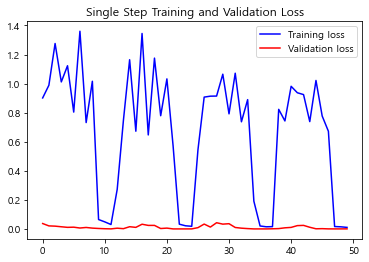

In [356]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and Validation Loss')

In [357]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [358]:
def create_time_steps(length):
    return list(range(-length, 0))

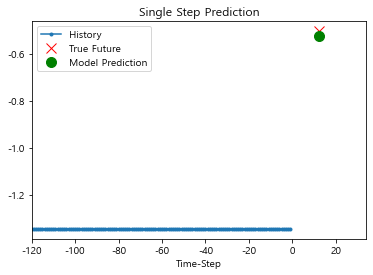

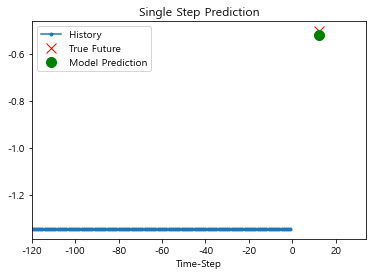

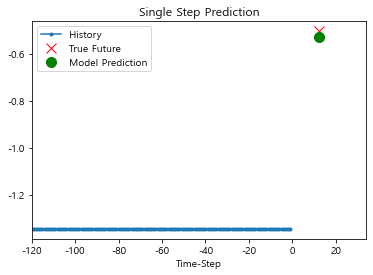

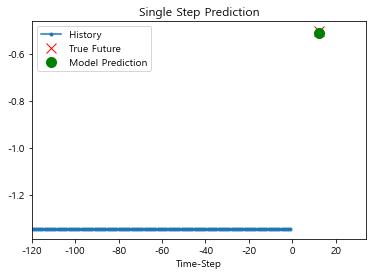

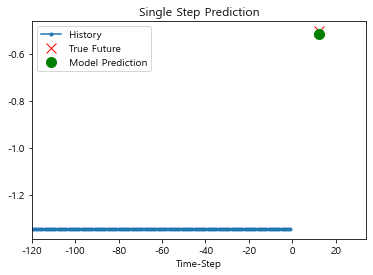

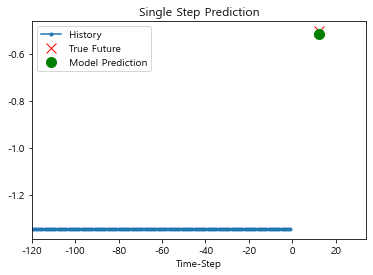

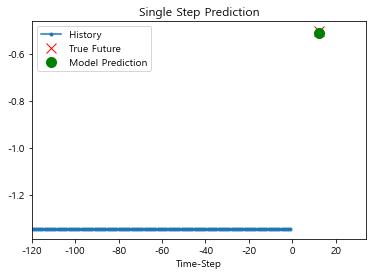

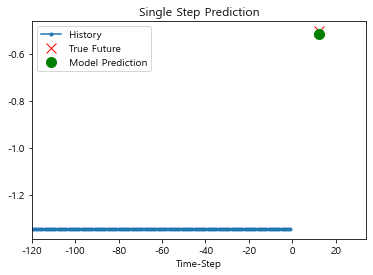

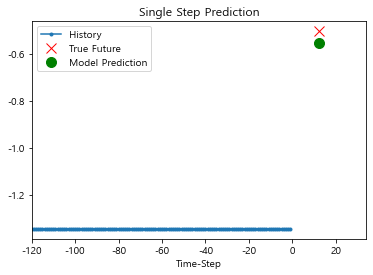

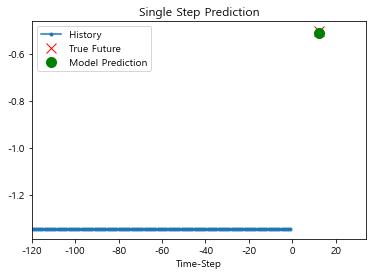

In [359]:
for x, y in val_data_single.take(10):
    plot = show_plot([x[0][:,4].numpy(), y[0].numpy(), 
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction') 
    plot.show()

In [360]:
## multi step

In [361]:
past_history = 720 # 60분 * 24시간 * 2일
future_target = 72 # 60분*3 -> 1시간 기준으로 3시간후
STEP = 6 #1분 -> 1시간이니까

x_train_multi, y_train_multi = multivariate_data(comp_1_one, comp_1_one[:, 4], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(comp_1_one, comp_1_one[:, 4], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\n Target 역률평균 to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 7)

 Target 역률평균 to predict : (72,)


In [321]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1000 #전체 데이터를 몇 개의 그룹으로 나눠서 학습할때 나누는 그 크기 (최대한 키우기)
EPOCHS = 100 #학습 반복 횟수 (Validation set에서 epoch 늘릴수록 에러 감소하다가 어느 지점에서 다시 증가 -> 최소)
EVALUATION_INTERVAL = 10

In [322]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [323]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32, return_sequences=True,input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error',metrics=['mae'])

In [324]:
for x, y in val_data_multi.take(1):
    print(multi_step_model.predict(x).shape)

(1000, 72)


In [325]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_multi,
                                            validation_steps=50)

Epoch 1/100
10/10 [==============================] - 34s 3s/step - loss: 0.0339 - mae: 0.1310 - val_loss: 1.9101e-06 - val_mae: 0.0011
Epoch 2/100
10/10 [==============================] - 32s 3s/step - loss: 0.0389 - mae: 0.1389 - val_loss: 1.1785e-06 - val_mae: 8.7209e-04
Epoch 3/100
 9/10 [==========================>...] - ETA: 1s - loss: 0.0382 - mae: 0.1366

KeyboardInterrupt: 

In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(multi_step_history,
                   'Multi-Step Training and Validation Loss')

In [ ]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    plt.plot(num_in, np.array(history[:,4]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future),'b-',label='True Future')
    
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP,np.array(prediction),'r-',label='Predicted Future')
    
    plt.legend(loc='upper left')
    #plt.ylim([-0.81,-0.79])
    plt.xlim([-15,15])
    #plt.ylim([-0.9,-0.5])
    plt.show()

In [ ]:
def create_time_steps(length):
    return list(range(-length,0))

In [ ]:
for x, y in val_data_multi.take(20):
    multi_step_plot(x[0],y[0],multi_step_model.predict(x)[0])

In [ ]:
scores=multi_step_model.evaluate(x_val_multi, y_val_multi,batch_size=1000)

In [ ]:
scores

In [ ]:
loss_MSE,MAE =multi_step_model.evaluate(x_val_multi, y_val_multi, batch_size=1000)

print('loss_MSE : ', loss_MSE)
print('MAE : ', MAE)

In [ ]:
y_pred = multi_step_model.predict(x_val_multi)
print(y_pred) ##예측값

In [ ]:
### RMSE

from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('RMSE : ', RMSE(y_val_multi, y_pred)) 

In [ ]:
## R2

from sklearn.metrics import r2_score
r2_score = r2_score(y_val_multi, y_pred)

print('R2 : ', r2_score)

# ARIMA

In [18]:
comp_1_one=pd.concat([X_train,X_test],axis=0)

train = comp_1_one[:43129]

In [19]:
train

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
NEWTIME,,,,,,,
2020-09-16 00:06:00,1.044311,-0.164955,-0.197013,0.000566,0.013914,-0.910480,-0.095401
2020-09-16 00:07:00,1.040028,0.000000,0.262421,0.000566,-0.020871,0.617825,-0.143835
2020-09-16 00:08:00,1.050635,0.000000,0.788051,0.000566,-0.006957,0.910480,-0.119618
2020-09-16 00:09:00,1.058999,0.000000,1.115880,0.000566,-0.027828,2.731439,-0.047700
2020-09-16 00:10:00,1.061243,0.000000,0.919655,0.000566,-0.020871,0.000000,-0.119618
...,...,...,...,...,...,...,...
2020-10-15 22:50:00,1.943085,0.000000,-0.722643,0.000847,0.841812,-0.325171,-0.668541
2020-10-15 22:51:00,6.090786,0.000000,1.707706,0.000884,-1.829723,-0.617825,-0.573140
2020-10-15 22:52:00,0.804013,0.000000,-0.788051,0.000827,-0.006957,0.585308,-0.406555


In [20]:
## auto.arima(data)를 입력하면 가장 적절한 arima모델을 추천
# auto_arima함수를 사용하여 

from pmdarima.arima import auto_arima

model=auto_arima(train['역률평균'],trace=True, error_action='ignore', 
                 start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

## 튜닝해보기!!! AIC(통계모델 성능을 측정하는 기준)이 낮을 수록 좋은 모델

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25789.206, Time=1.76 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23830.390, Time=1.72 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=22511.421, Time=2.87 sec


KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
comp_1_one.iloc[43129:]

In [ ]:
comp_1_one.iloc[:, 4]

In [21]:
## ARIMA 모델링
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

model = ARIMA(comp_1_one.iloc[:, 4], order = (1, 0, 2))
model_fit = model.fit(disp = 0)
#disp : 수렴 정보를 나타냄 - True이면 수렴, <0은 출력없음

start_index = datetime(2020, 10, 15, 23, 1, 0)
end_index = datetime(2020, 10, 27, 23, 59, 19)
forecast = model_fit.predict(start = start_index, end = end_index, typ = 'levels')

<ipython-input-21-53b88aa0c94b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnin

MemoryError: Unable to allocate 27.2 GiB for an array with shape (60408, 60408) and data type float64

In [ ]:
#시각화
plt.figure(figsize=(22,8))
plt.plot(comp_1_one.index[:], comp_1_one.iloc[:,4],label='original')
plt.plot(forecast,label='predicted')
plt.title('Time Seires Forcast')
plt.xlabel('Time')
plt.ylabel('전압고조파평균')
plt.legend()
plt.show()